<a href="https://colab.research.google.com/github/Adityajl/YOLOv8-Object-Detection-Classification-Segmentation/blob/master/YOLOv8_Object_Detection%2C_Instance_Segmentation%2C_and_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**YOLOv8 is the latest family of YOLO based Object Detection models from Ultralytics providing state-of-the-art performance.**

 We run inference for three different tasks:



* Object detection
* Instance segmentation
* Image classification   



In [1]:
import matplotlib.pyplot as plt
import os
import glob
import requests
import zipfile

## Download Data

In [2]:
def download_file(url, save_name):
  url = url
  if not os.path.exists(save_name):
    file = requests.get(url)
    open(save_name, 'wb').write(file.content)

download_file('https://www.dropbox.com/s/zqgucpnbp6c1uyw/images.zip?dl=1',
    'images.zip')

In [4]:
# Unzip the data file
def unzip(zip_file=None):
  try:
    with zipfile.ZipFile(zip_file) as z:
      z.extractall("./")
      print('Extracted all')
  except:
    print('Invalid file')

unzip('images.zip')

Extracted all


## Install Ultralytics Package

In [5]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 593.1/593.1 kB 9.4 MB/s eta 0:00:00


## Object Detection

In [6]:
!yolo task=detect mode=predict model=yolov8x.pt source='images' name=yolov8x_det

100% 131M/131M [00:00<00:00, 220MB/s]
Ultralytics YOLOv8.0.112 🚀 Python-3.10.11 torch-2.0.1+cu118 CPU
YOLOv8x summary (fused): 268 layers, 68200608 parameters, 0 gradients

image 1/4 /content/images/2008_000183.jpg: 640x352 1 dog, 2826.2ms
image 2/4 /content/images/2008_000562.jpg: 480x640 2 persons, 1 bicycle, 1 car, 2 backpacks, 3337.7ms
image 3/4 /content/images/2008_000880.jpg: 448x640 9 persons, 1 car, 1 truck, 3 horses, 3030.8ms
image 4/4 /content/images/2008_001782.jpg: 480x640 4 persons, 1 sports ball, 1 tennis racket, 4666.4ms
Speed: 6.0ms preprocess, 3465.3ms inference, 9.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/yolov8x_det


In [7]:
# plot and visualize images in a 2x2 grid

def visualize(result_dir):
  """
  Function accepts a list of images and plots them in a 2x2 grid.
  """
  plt.figure(figsize=(20,12))
  image_names = glob.glob(os.path.join(result_dir, '*.jpg'))
  for i, image_name in enumerate(image_names):
    image = plt.imread(image_name)
    plt.subplot(2, 2, i+1)
    plt.imshow(image)
    plt.axis('off')
  plt.tight_layout()
  plt.show()

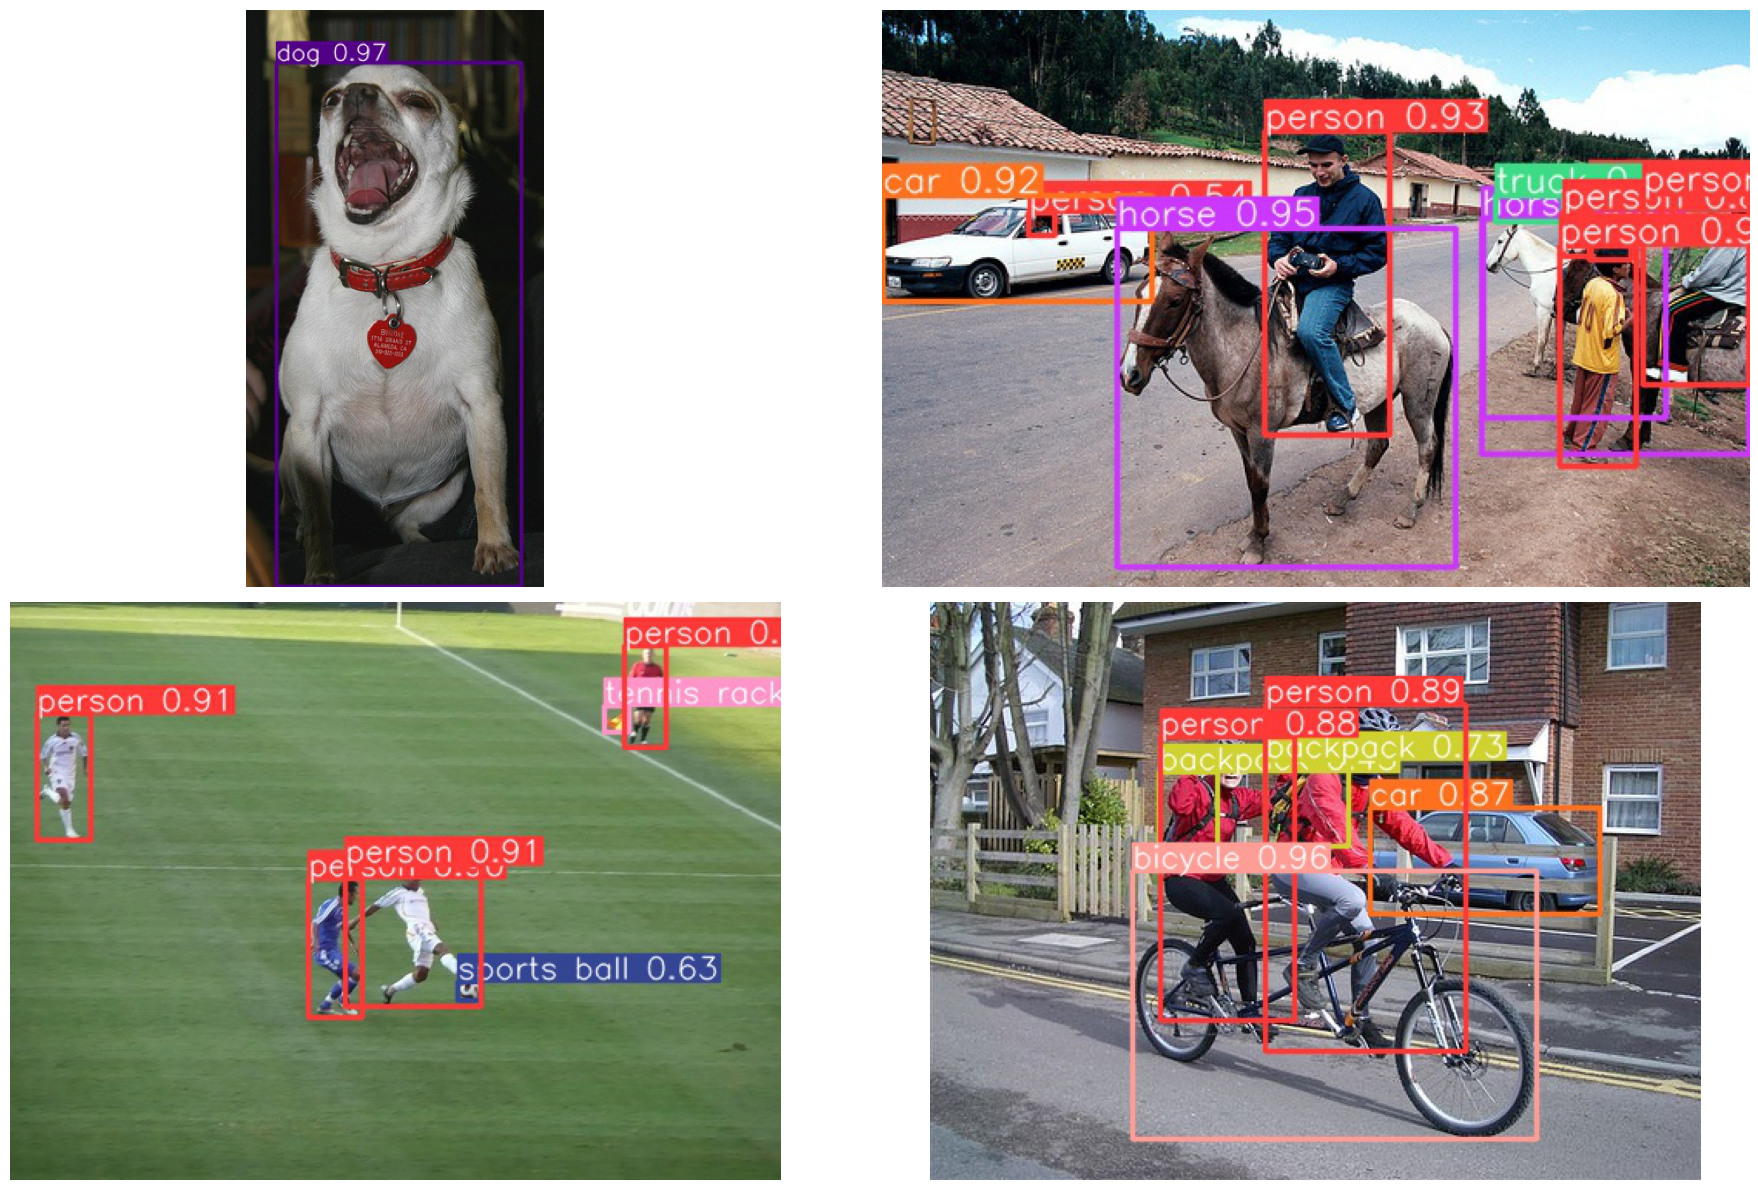

In [8]:
visualize('runs/detect/yolov8x_det')

## Instance Segmentation

In [9]:
!yolo task=segment mode=predict model=yolov8x-seg.pt source='images' name=yolov8x_seg

100% 137M/137M [00:01<00:00, 101MB/s] 
Ultralytics YOLOv8.0.112 🚀 Python-3.10.11 torch-2.0.1+cu118 CPU
YOLOv8x-seg summary (fused): 295 layers, 71797696 parameters, 0 gradients

image 1/4 /content/images/2008_000183.jpg: 640x352 1 dog, 3347.7ms
image 2/4 /content/images/2008_000562.jpg: 480x640 2 persons, 1 bicycle, 1 car, 1 backpack, 5384.3ms
image 3/4 /content/images/2008_000880.jpg: 448x640 8 persons, 2 cars, 1 truck, 2 horses, 1 cell phone, 4065.8ms
image 4/4 /content/images/2008_001782.jpg: 480x640 4 persons, 1 sports ball, 1 tennis racket, 5332.5ms
Speed: 3.0ms preprocess, 4532.6ms inference, 20.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/yolov8x_seg


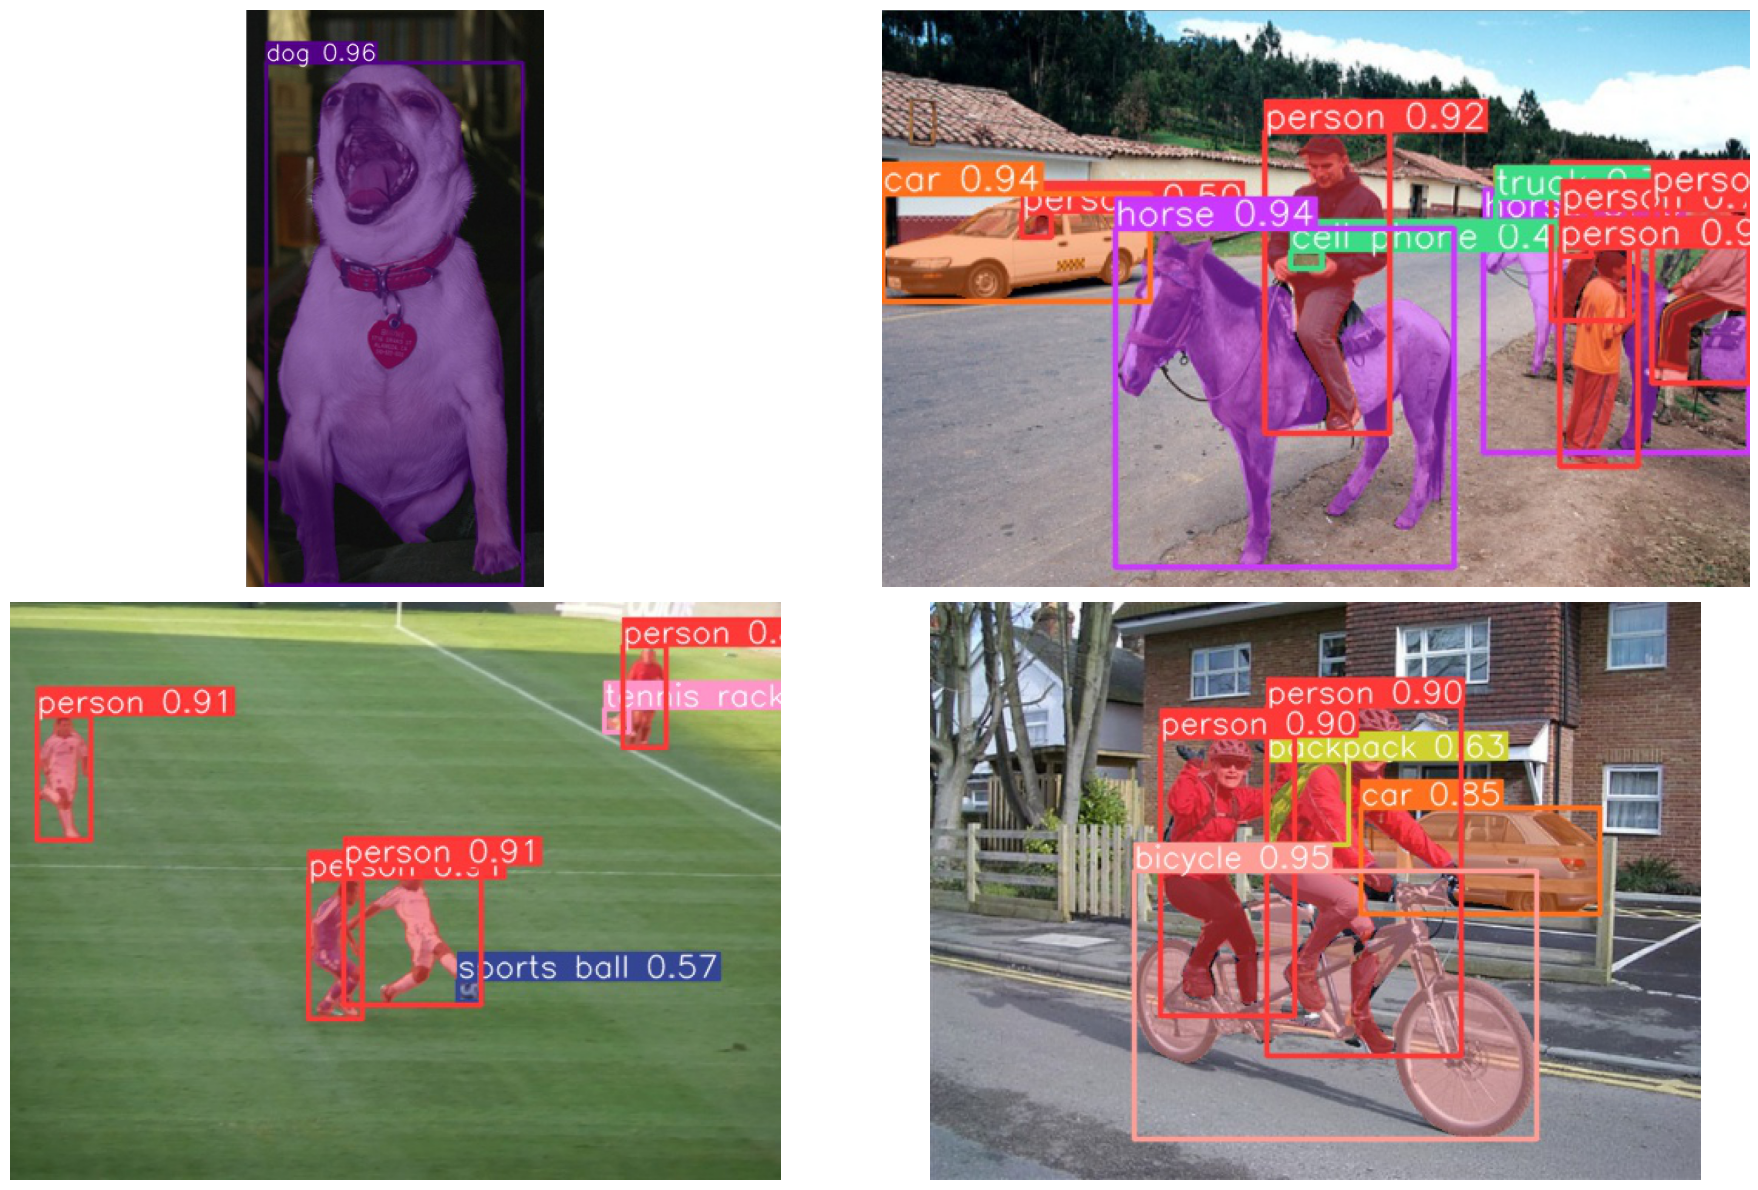

In [10]:
visualize('runs/segment/yolov8x_seg/')

## Image Classification

In [11]:
!yolo task=classify mode=predict model=yolov8x-cls.pt source='images' name=yolov8x_cls

100% 110M/110M [00:00<00:00, 219MB/s]
Ultralytics YOLOv8.0.112 🚀 Python-3.10.11 torch-2.0.1+cu118 CPU
YOLOv8x-cls summary (fused): 133 layers, 57404200 parameters, 0 gradients

image 1/4 /content/images/2008_000183.jpg: 224x224 Chihuahua 0.32, Labrador_retriever 0.23, pug 0.14, toy_terrier 0.11, kelpie 0.07, 456.0ms
image 2/4 /content/images/2008_000562.jpg: 224x224 bicycle-built-for-two 1.00, moped 0.00, tricycle 0.00, mountain_bike 0.00, jinrikisha 0.00, 676.4ms
image 3/4 /content/images/2008_000880.jpg: 224x224 horse_cart 0.35, Arabian_camel 0.12, oxcart 0.07, sorrel 0.05, ox 0.05, 681.7ms
image 4/4 /content/images/2008_001782.jpg: 224x224 ballplayer 0.75, soccer_ball 0.22, baseball 0.01, racket 0.01, football_helmet 0.00, 679.7ms
Speed: 1.4ms preprocess, 623.4ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/yolov8x_cls


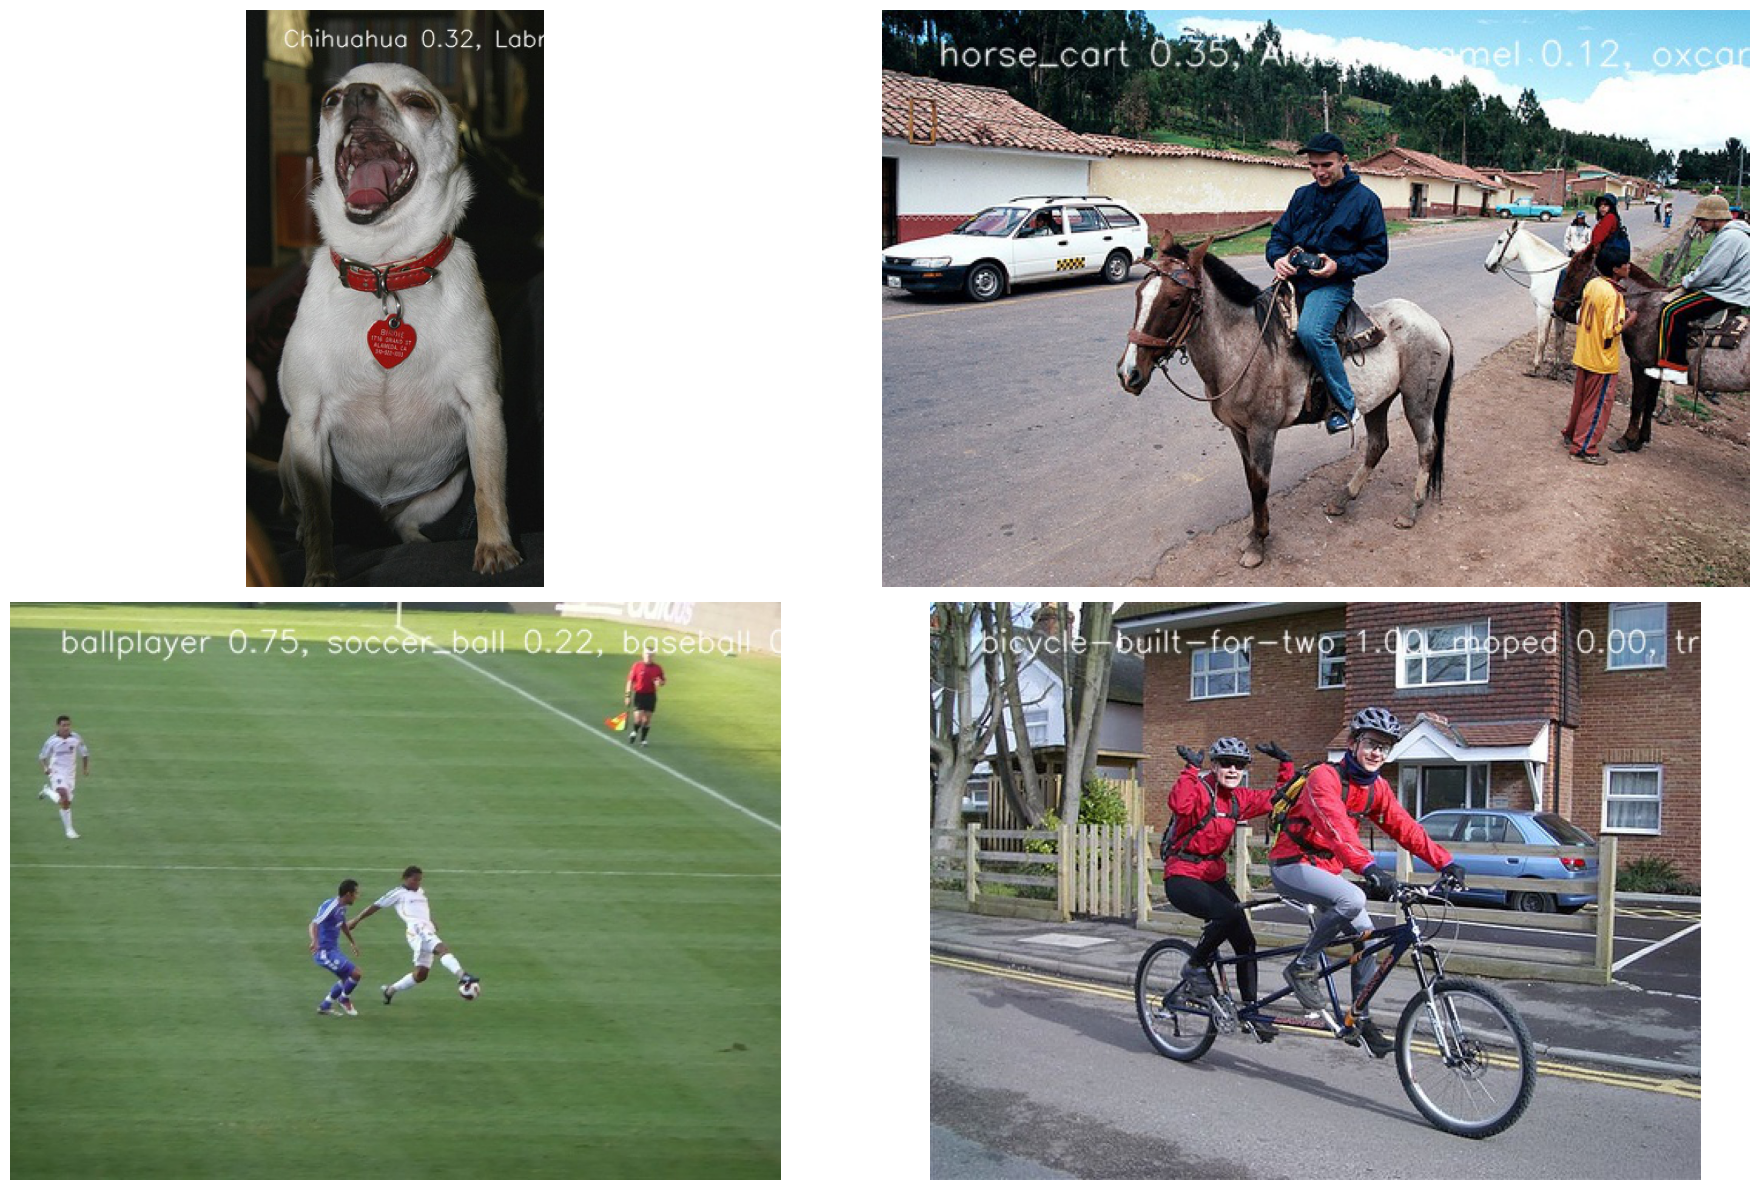

In [12]:
visualize('runs/classify/yolov8x_cls/')